In [1]:
# Import pandas datareader
import pandas_datareader
import yfinance as yf
from pandas_datareader import data as pdr

In [2]:
yf.pdr_override()
# Set the start and end date
start_date = '1999-01-01'
end_date = '2020-12-31'
# Set the ticker
aapl = 'AAPL'
amzn = 'AMZN'
# Get the data from Yahoo Finance
aapl_data = pdr.get_data_yahoo(aapl, start_date, end_date)
amzn_data = pdr.get_data_yahoo(amzn, start_date, end_date)
# print('\t APPLE and AMAZON Stock Time-Series Data')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [3]:
aapl_data.head()
# Apple Time Series data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1998-12-31,0.361607,0.369420,0.352679,0.365513,0.315310,271689600
1999-01-04,0.376116,0.377232,0.357143,0.368304,0.317717,952884800
1999-01-05,0.374442,0.392299,0.370536,0.386719,0.333603,1410113600
1999-01-06,0.393973,0.393973,0.366071,0.372768,0.321569,1348569600
1999-01-07,0.377232,0.402344,0.376116,0.401786,0.346601,1429019200


In [4]:
amzn_data.head()
# Amazon Time Series data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1998-12-31,52.875000,55.166668,52.6875,53.541668,53.541668,18298200
1999-01-04,54.614582,59.333332,53.3125,59.156250,59.156250,39292200
1999-01-05,54.781250,64.875000,53.2500,62.250000,62.250000,62873200
1999-01-06,68.187500,70.187500,67.0000,69.000000,69.000000,36176600
1999-01-07,68.562500,80.125000,66.5000,79.437500,79.437500,47274600


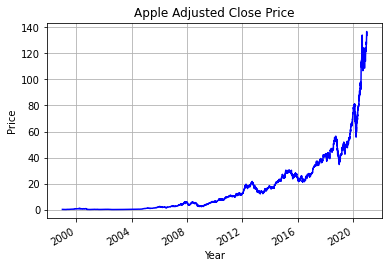

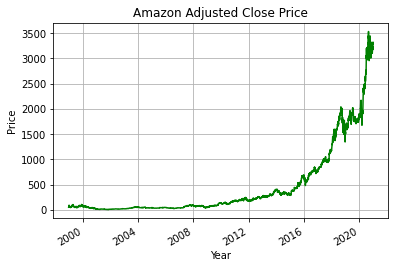

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
aapl_data['Adj Close'].plot(grid=True, color='blue')
plt.title('Apple Adjusted Close Price')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()
amzn_data['Adj Close'].plot(grid=True, color='green')
plt.title('Amazon Adjusted Close Price')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

## Overnight Return = (Open Price - Previous Close Price) / Previous Close Price

### Apple stock's Overnight Returns

In [6]:
##Previous day close to today's open
aapl_data['overnight_returns'] = (aapl_data['Open'] - aapl_data['Close'].shift(1)) / aapl_data['Close'].shift(1)
aapl_data['intraday_returns'] = (aapl_data['Close'] - aapl_data['Open']) / aapl_data['Open']

# Print last 5 returns
aapl_data.tail(5)

,Open,High,Low,Close,Adj Close,Volume,overnight_returns,intraday_returns
Date,,,,,,,,
2020-12-23,132.160004,132.429993,130.779999,130.960007,130.960007,88223700,0.002123,-0.009080
2020-12-24,131.320007,133.460007,131.100006,131.970001,131.970001,54930100,0.002749,0.004950
2020-12-28,133.990005,137.339996,133.509995,136.690002,136.690002,124486200,0.015307,0.020151
2020-12-29,138.050003,138.789993,134.339996,134.869995,134.869995,121047300,0.009950,-0.023035
2020-12-30,135.580002,135.990005,133.399994,133.720001,133.720001,96452100,0.005264,-0.013719


### Amazon stock's Overnight Returns

In [7]:
##Previous day close to today's open
amzn_data['overnight_returns'] = (amzn_data['Open'] - amzn_data['Close'].shift(1)) / amzn_data['Close'].shift(1)
amzn_data['intraday_returns'] = (amzn_data['Close'] - amzn_data['Open']) / amzn_data['Open']

#Print last 5 returns
amzn_data.tail(5)

,Open,High,Low,Close,Adj Close,Volume,overnight_returns,intraday_returns
Date,,,,,,,,
2020-12-23,3205.000000,3210.129883,3184.169922,3185.270020,3185.270020,2093800,-0.000474,-0.006156
2020-12-24,3193.899902,3202.000000,3169.000000,3172.689941,3172.689941,1451900,0.002709,-0.006641
2020-12-28,3194.000000,3304.000000,3172.689941,3283.959961,3283.959961,5686800,0.006717,0.028165
2020-12-29,3309.939941,3350.649902,3281.219971,3322.000000,3322.000000,4872900,0.007911,0.003644
2020-12-30,3341.000000,3342.100098,3282.469971,3285.850098,3285.850098,3209300,0.005719,-0.016507


In [8]:
# Allocating 10000$ to Apple Stock
initial_asset = 10000

aapl_data['overnight_returns'] = aapl_data['overnight_returns'].fillna(0)
aapl_data['night_investment_value'] = 0
prev_val = initial_asset

# Evaluating current value of investment at each instant using Night Trading Strategy, i.e., Capturing Overnight Returns
for i, j in aapl_data.iterrows():
    aapl_data.loc[i, 'night_investment_value'] = prev_val + aapl_data.loc[i, 'overnight_returns'] * prev_val
    prev_val = aapl_data.loc[i, 'night_investment_value']

aapl_data['intraday_returns'] = aapl_data['intraday_returns'].fillna(0)
aapl_data['day_investment_value'] = 0
prev_val = initial_asset

# Evaluating current value of investment at each instant using Intraday trading
for i, j in aapl_data.iterrows():
    aapl_data.loc[i, 'day_investment_value'] = prev_val + aapl_data.loc[i, 'intraday_returns'] * prev_val
    prev_val = aapl_data.loc[i, 'day_investment_value']

aapl_data.tail(5)

,Open,High,Low,Close,Adj Close,Volume,overnight_returns,intraday_returns,night_investment_value,day_investment_value
Date,,,,,,,,,,
2020-12-23,132.160004,132.429993,130.779999,130.960007,130.960007,88223700,0.002123,-0.009080,1.359645e+06,26636.438957
2020-12-24,131.320007,133.460007,131.100006,131.970001,131.970001,54930100,0.002749,0.004950,1.363383e+06,26768.281188
2020-12-28,133.990005,137.339996,133.509995,136.690002,136.690002,124486200,0.015307,0.020151,1.384251e+06,27307.681700
2020-12-29,138.050003,138.789993,134.339996,134.869995,134.869995,121047300,0.009950,-0.023035,1.398024e+06,26678.644086
2020-12-30,135.580002,135.990005,133.399994,133.720001,133.720001,96452100,0.005264,-0.013719,1.405384e+06,26312.643986


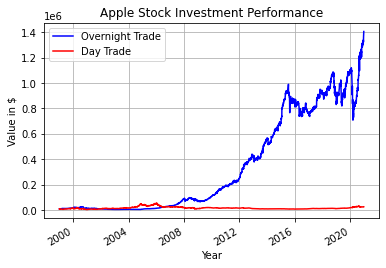

In [9]:
aapl_data['night_investment_value'].plot(grid=True, color='blue', label='Overnight Trade')
aapl_data['day_investment_value'].plot(grid=True, color='red', label='Day Trade')
plt.title('Apple Stock Investment Performance')
plt.xlabel('Year')
plt.ylabel('Value in $')
plt.legend()
plt.show()

In [10]:
# Allocating 10000$ to Amazon Stock
initial_asset = 10000

amzn_data['overnight_returns'] = amzn_data['overnight_returns'].fillna(0)
amzn_data['night_investment_value'] = 0
prev_val = initial_asset

# Evaluating current value of investment at each instant using Night Trading Strategy, i.e., Capturing Overnight Returns
for i, j in amzn_data.iterrows():
    amzn_data.loc[i, 'night_investment_value'] = prev_val + amzn_data.loc[i, 'overnight_returns'] * prev_val
    prev_val = amzn_data.loc[i, 'night_investment_value']

amzn_data['intraday_returns'] = amzn_data['intraday_returns'].fillna(0)
amzn_data['day_investment_value'] = 0
prev_val = initial_asset

# Evaluating current value of investment using Day Trading Strategy
for i, j in amzn_data.iterrows():
    amzn_data.loc[i, 'day_investment_value'] = prev_val + amzn_data.loc[i, 'intraday_returns'] * prev_val
    prev_val = amzn_data.loc[i, 'day_investment_value']

amzn_data.head(5)

,Open,High,Low,Close,Adj Close,Volume,overnight_returns,intraday_returns,night_investment_value,day_investment_value
Date,,,,,,,,,,
1998-12-31,52.875000,55.166668,52.6875,53.541668,53.541668,18298200,0.000000,0.012608,10000.000000,10126.083771
1999-01-04,54.614582,59.333332,53.3125,59.156250,59.156250,39292200,0.020039,0.083159,10200.388625,10968.153934
1999-01-05,54.781250,64.875000,53.2500,62.250000,62.250000,62873200,-0.073957,0.136338,9446.001722,12463.526889
1999-01-06,68.187500,70.187500,67.0000,69.000000,69.000000,36176600,0.095382,0.011916,10346.975782,12612.038208
1999-01-07,68.562500,80.125000,66.5000,79.437500,79.437500,47274600,-0.006341,0.158614,10281.369957,14612.489118


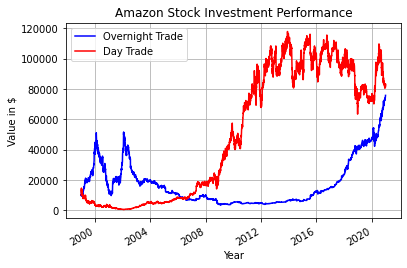

In [11]:
amzn_data['night_investment_value'].plot(grid=True, color='blue', label='Overnight Trade')
amzn_data['day_investment_value'].plot(grid=True, color='red', label='Day Trade')
plt.title('Amazon Stock Investment Performance')
plt.xlabel('Year')
plt.ylabel('Value in $')
plt.legend()
plt.show()